## Important Info: Estimate the verification accuracy of DAC for project data
- Used DAC (RP projected) data to train an NN model
- There are 193 different user's profiles and each profiles has 1000 data samples (normalized data)
- Each data semple has 65 different features and RP prjection moved them to 56 features
- Random matrix of RP follow following distributions: Pr(x=+1)= 1/2s; Pr(x=-1)= 1/2s, Pr(x=0)= 1-1/s where s=3
- The value of dimension reduction k is calculated by k= [(4+2\beta)/(\epsolon^2/2+\epsolon^3/2)]log (n) where n is total sample in a profile and \epsolon,\beta>0
- NN has 2 dense layers along with 'BatchNormalization' and 'relu' activation funcation
- Last layer is softmax function (193 classes)
- Included a summary of the NN architecture
- Need shallow as RP make users profile more distinct
- For 10 rounds of training training accurach reached to 100.0% and validation accuracy reached to 100.0%
- Included a graph that shows change of training and validation acccruacy in different ephocs
- Test accruacy 100.0%

In [1]:
#Read all data [0-192: 193 users' oversampled data]
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledDACData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,Label
0,0.178862,0.316667,0.251082,0.144628,0.366255,0.323770,0.065844,0.020243,0.032129,0.060729,...,0.732435,0.736285,0.734870,0.707042,0.131098,0.196,1.0,0.279070,0.016393,0
1,0.166667,0.108333,0.069264,0.074380,0.246914,0.327869,0.213992,0.198381,0.116466,0.085020,...,0.670837,0.671800,0.670509,0.651643,0.170732,0.156,0.0,0.209302,0.234973,0
2,0.162602,0.112500,0.510823,0.280992,0.213992,0.040984,0.086420,0.052632,0.184739,0.259109,...,0.651588,0.651588,0.657061,0.642254,0.320122,0.124,0.0,0.186047,0.327869,0
3,0.085366,0.045833,0.025974,0.045455,0.181070,0.090164,0.045267,0.194332,0.188755,0.323887,...,0.641963,0.641963,0.645533,0.635681,0.204268,0.080,1.0,0.325581,0.054645,0
4,0.512195,0.295833,0.220779,0.247934,0.378601,0.069672,0.600823,0.785425,0.465863,0.477733,...,0.727623,0.732435,0.731028,0.694836,0.173780,0.504,0.0,0.255814,0.245902,0


In [2]:
#replace the user ID by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0      300
1      300
2      300
3      300
4      300
      ... 
188    300
189    300
190    300
191    300
192    300
Name: Label, Length: 193, dtype: int64

In [3]:
#seperate the profile in two groups (80.0%, 20.0%): (i) Training profile (0-155), and (ii) auxiliary profile (156-192)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] <155]
auxilaryData = dataset[dataset['Label'] >= 155]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))
#assigned 0-154 users' data to dataset
dataset=trainingData

Total user in training dataset: 155
Total user in auxiliary dataset: 38


In [4]:
#total use in the system
totalUser= len(pd.unique(dataset['Label']))
trainingData=dataset
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 155


In [5]:
#Project the data with different seed
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
datasetRP = pd.DataFrame(columns=column1)
for seed in range(0,155):
    rng = np.random.RandomState(seed)
    X = dataset[dataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['ID']=seed
    datasetRP = pd.concat([datasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(dataset.shape)
print(datasetRP.shape)


C:\Users\mdmor\AppData\Local\Temp\ipykernel_24416\2206063142.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datasetRP = pd.concat([datasetRP, XRP], ignore_index=True)


(46540, 66)
(46540, 57)


In [6]:
#total use in the system
totalUser= len(pd.unique(datasetRP['ID']))
trainingData=datasetRP
print("Total user in the training dataset:", len(pd.unique(trainingData['ID'])))

Total user in the training dataset: 155


In [7]:
#Prepare the group 1 data for training and testing the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=trainingData.drop(columns=['ID'])
y=trainingData['ID']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=22)
#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=22)

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [8]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(37232, 56)
(37232, 155)
(9308, 56)
(9308, 155)


In [9]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [10]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
#neural network architecture for model training

def create_classifierRP(release=False,totalClass=10):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=56))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.3))
  
  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.3))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifierRP()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,898 (85.54 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [12]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifierRP(True,155)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=20, validation_data=(Xval, yval),verbose=1)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3555 - loss: 3.5152 - val_accuracy: 0.9996 - val_loss: 0.1517
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8850 - loss: 0.5884 - val_accuracy: 0.9999 - val_loss: 0.0056
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9256 - loss: 0.2934 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9386 - loss: 0.2220 - val_accuracy: 1.0000 - val_loss: 4.6359e-04
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9487 - loss: 0.1800 - val_accuracy: 1.0000 - val_loss: 2.4212e-04
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9540 - loss: 0.1585 - val_accuracy: 1.0000 - val_loss: 1.2640e-04
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9574 - loss: 0.1491 - val_accuracy: 1.0000 - val_loss: 1.0451e-04
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9611 - loss: 0.1332 - 

Text(0.5, 0, 'epochs')

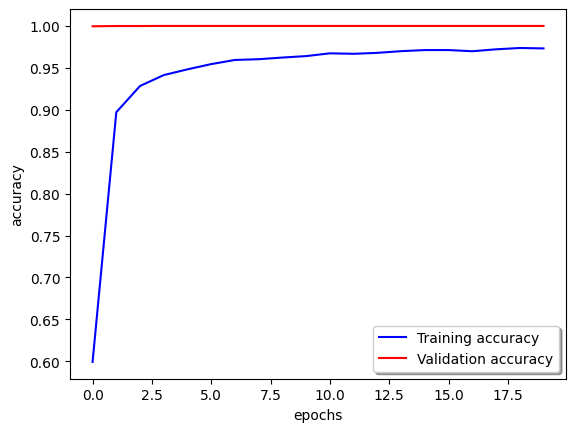

In [13]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [14]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 155]
#testdataset.head()

In [15]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']

testdatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,155):
    rng = np.random.RandomState(seed)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_24416\2241069678.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(4121, 66)
(4121, 57)


In [16]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [17]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.1370e-05
Loss: 1.639494439586997e-05
Accuracy: 1.0
